# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=15))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


Data exploration is one of the key part of the machine learning model development. Below I'm printing the data exploration summary using the function written during one of the Kaggle challenge by one of it's participants.

In [6]:
import skutils
skutils.pretty_stats(data)

property,values
Number of features,14
Number of categorical features,9
Number of numerical features,5
Number of Samples,45222


feature,Unique,NaN,min,min count,mean,max,max count
age,74,0,17.0,493,38.5479412675,90.0,46
education-num,16,0,1.0,72,10.1184600416,16.0,544
capital-gain,121,0,0.0,41432,1101.43034364,99999.0,229
capital-loss,97,0,0.0,43082,88.5954181593,4356.0,1
hours-per-week,96,0,1.0,12,40.9380168944,99.0,123


feature,Num Categories,Categories,NaN
workclass,7,"[' Private', ' Self-emp-inc', ' State-gov', ' Local-gov', ' Without-pay', ' Self-emp-not-inc', ' Federal-gov']",0
education_level,16,"[' 7th-8th', ' Prof-school', ' 1st-4th', ' Assoc-voc', ' Masters', ' Assoc-acdm', ' 9th', ' Doctorate', ' Bachelors', ' 5th-6th', ' Some-college', ' 10th', ' 11th', ' HS-grad', ' Preschool', ' 12th']",0
marital-status,7,"[' Separated', ' Divorced', ' Married-spouse-absent', ' Widowed', ' Married-AF-spouse', ' Never-married', ' Married-civ-spouse']",0
occupation,14,"[' Armed-Forces', ' Craft-repair', ' Other-service', ' Transport-moving', ' Prof-specialty', ' Sales', ' Machine-op-inspct', ' Exec-managerial', ' Handlers-cleaners', ' Protective-serv', ' Adm-clerical', ' Tech-support', ' Farming-fishing', ' Priv-house-serv']",0
relationship,6,"[' Wife', ' Own-child', ' Unmarried', ' Husband', ' Other-relative', ' Not-in-family']",0
race,5,"[' Asian-Pac-Islander', ' White', ' Other', ' Amer-Indian-Eskimo', ' Black']",0
sex,2,"[' Male', ' Female']",0
native-country,41,"[' Iran', ' Cuba', ' Puerto-Rico', ' Outlying-US(Guam-USVI-etc)', ' El-Salvador', ' Guatemala', ' Holand-Netherlands', ' United-States', ' China', ' Thailand', ' Haiti', ' Germany', ' Columbia', ' Hungary', ' Dominican-Republic', ' Poland', ' Philippines', ' Trinadad&Tobago', ' Vietnam', ' South', ' Honduras', ' Mexico', ' Portugal', ' England', ' Jamaica', ' India', ' Yugoslavia', ' Greece', ' Japan', ' Taiwan', ' Nicaragua', ' Canada', ' Hong', ' Italy', ' Scotland', ' France', ' Cambodia', ' Ecuador', ' Laos', ' Peru', ' Ireland']",0
income,2,"['<=50K', '>50K']",0


feature,highest value,correlated with,mean
age,0.101992244782,hours-per-week,0.069662253881
education-num,0.146206237665,hours-per-week,0.0981118266547
capital-gain,0.126906802489,education-num,0.0806431973272
capital-loss,0.0817113146648,education-num,0.0568397716117
hours-per-week,0.146206237665,education-num,0.0965684417316


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**Hint:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [5]:
features_temp = list(data.columns)
features_temp.pop()

'income'

In [6]:
features_con = list(data.select_dtypes(exclude=['object', 'category']).columns)
features_con
features_num = list(data.select_dtypes(include=['object','category']).columns)

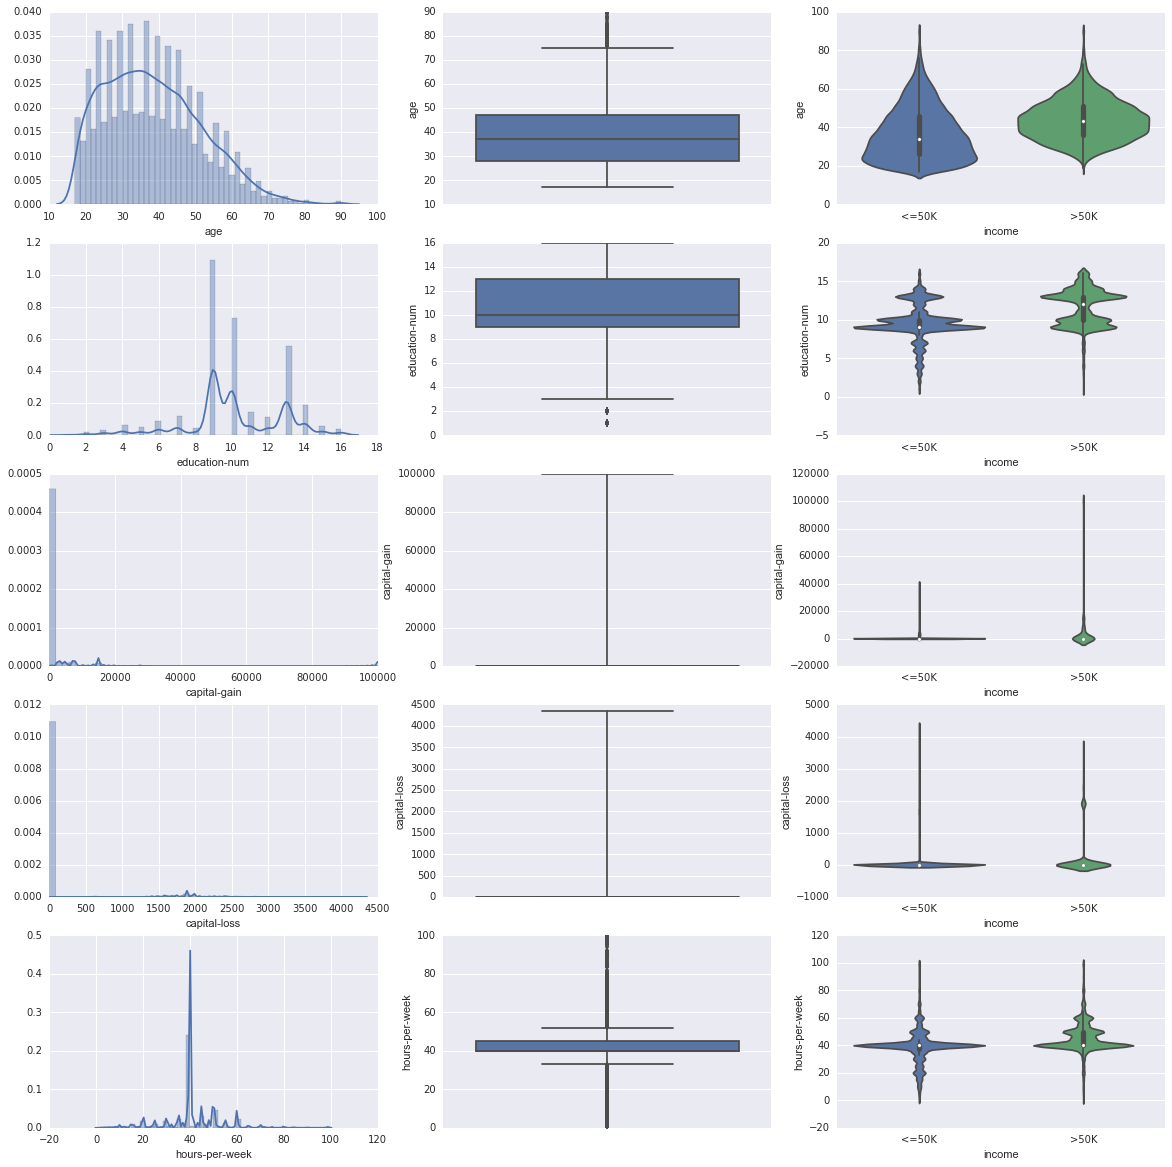

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(20,20))
    
for i in range(len(features_cat)):
    ax = f.add_subplot(len(features_con), 3, 3*i+1)
    sns.distplot(data[features_cat[i]])
    ax = f.add_subplot(len(features_con), 3, 3*i+2)
    sns.boxplot(y=data[features_cat[i]])
    ax = f.add_subplot(len(features_con), 3, 3*i+3)
    sns.violinplot(y=data[features_con[i]], x=data.income)
    

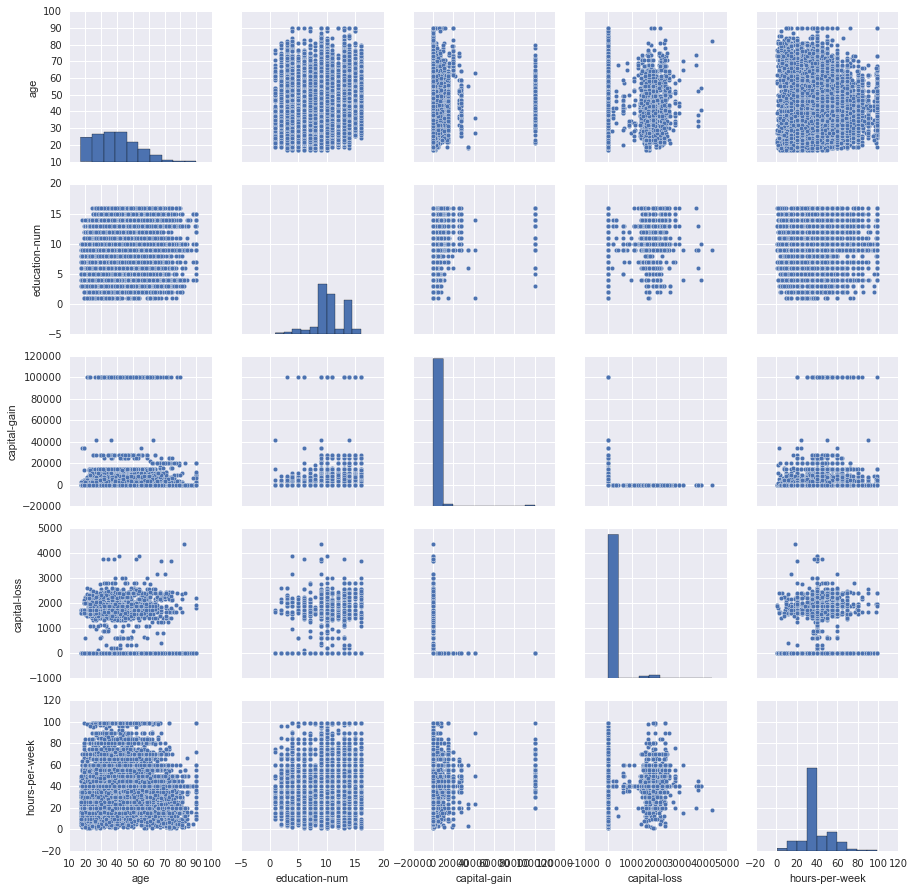

In [69]:
sns.pairplot(data)

In [7]:
### TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data.income=='>50K'])
# another way of calculating n_greater_50k is:
# n_greater_50k = sum(data['income'] == '>50K')

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = len(data[data.income=='<=50K'])

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100.0 * n_greater_50k / n_records

# Print the results
print "Total number of records: {}".format(n_records)
print "Individuals making more than $50,000: {}".format(n_greater_50k)
print "Individuals making at most $50,000: {}".format(n_at_most_50k)
print "Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

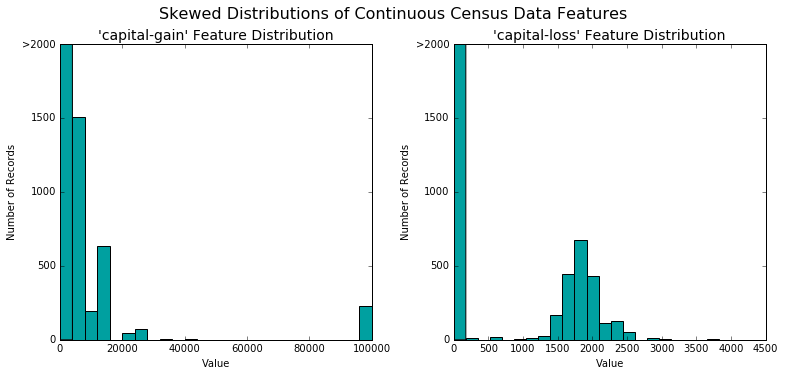

In [8]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

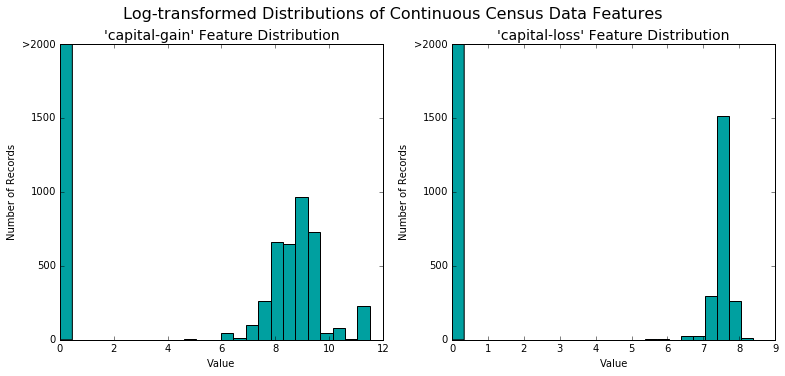

In [9]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_raw[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_raw, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [10]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.30137,State-gov,Bachelors,0.8,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_raw'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [11]:
# TODO: One-hot encode the 'features_raw' data using pd.get_dummies()
features = pd.get_dummies(features_raw)

# TODO: Encode the 'income_raw' data to numerical values
income = np.where(income_raw == '<=50K', 0, 1)
# alternative solution using lambda
# income = income_raw.apply(lambda x: 0 if x == '<=50K' else 1)

# Print the number of features after one-hot encoding
encoded = list(features.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

# Uncomment the following line to see the encoded feature names
#print encoded

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [12]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, income, test_size = 0.2, random_state = 0)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 

### Question 1 - Naive Predictor Performace
*If we chose a model that always predicted an individual made more than \$50,000, what would that model's accuracy and F-score be on this dataset?*  
**Note:** You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

In [13]:
# TODO: Calculate accuracy
accuracy = greater_percent/100

# TODO: Calculate F-score using the formula above for beta = 0.5
beta = 0.5
# prec = tp/(tp+fp)
# recall = tp/(tp+fn)
prec = 1.0 * n_greater_50k / (n_greater_50k + n_at_most_50k)
recall = 1.0 * n_greater_50k / (n_greater_50k)
fscore = 1.0*(1+beta**2)*prec*recall/(beta**2*prec+recall)

# Print the results 
print "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore)

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


As long as naive predictor always predicts 1, we can mention the following:
*  the accuracy (proportion of true positive to all predictions) and the precision (proportion of true positives to all positive predictions) are equal; 
*  recall (proportion of true positives to positives in a dataset) equals 1.  

So the simpler way to calculate F-score would be:
$$ F_{\beta} = (1 + \beta^2) \cdot \frac{accuracy}{\left( \beta^2 \cdot accuracy \right) + 1} $$

###  Supervised Learning Models
**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

Scikit-learn has a flow-chart which helps beginners to choose the appropriate algorithm to solve the machine learning problem. [8] According to this cheat-sheet (I have > 50 samples, predicting categories, having labeled training data, less than 100k samples, not a text data), I'm supposed to try the following algorithms:
1.  Linear SVC (Support Vector Machines Classifier).
2.  KNeighbors Classifier.
3.  Ensemble methods and SVC (with probably kernel methods).  
  
I find this recommendation really good. I'll keep using this flowchart further, however, this time I would start from something I've tried before: Naive Bayes, Decision Trees and Ensemble methods such as AdaBoost. On the backstage I'll try all available classification algorithms and choose the most effective.

#### Gaussian Naive Bayes (GaussianNB)  
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features. GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian [1].
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)
A classical use case for Naive Bayes is document classification: Determining whether a given (text) document corresponds to one or more categories (classify a news article about technology, politics, or sports). In the text case, the features used might be the presence or absence of key words. Algorithm was used also in a face recognition tasks.   
- *What are the strengths of the model; when does it perform well?*
  *  Super simple, you’re just doing a bunch of counts. If the NB conditional independence assumption actually holds, a Naive Bayes classifier will converge quicker than discriminative models like logistic regression, so we need less training data. And even if the NB assumption doesn’t hold, a NB classifier still often does a great job in practice. A good bet if want something fast and easy that performs pretty well. [2]
  *  Naive Bayes models in scikit-learn can be used to tackle large scale classification problems for which the full training set might not fit in memory thanks to partial_fit method.[1]  

- *What are the weaknesses of the model; when does it perform poorly?*
  *  it can’t learn interactions between features (e.g., it can’t learn that although you love movies with Brad Pitt and Tom Cruise, you hate movies where they’re together). [2]
  *  doesn't outcome probabilities for each class, but only to knowledge which class is the most likely.
- *What makes this model a good candidate for the problem, given what you know about the data?*
NB is a good start for me at the very beginning: when I'm on the data preprocessing step, NB's accuracy shows me my initial hypothesis are in the right directions.  


#### Decision Trees  
DT - is a decision support instrument, which allows to make a decision asking the minimum possible questions.
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)  
Decision trees might be used to solve any classification (and regression) problem, which especially required clear interpretation. F.ex. I've used decision trees algorithm for building a person of interest identifier based on financial and email data made public as a result of the Enron scandal in Data Analyst Nanodegree.  

- *What are the strengths of the model; when does it perform well?*  
  *  Decision trees algorithm is easy to use, and it allows us graphically to interpret data really well, understand much better than other algorithms (f.ex. Support Vector Machine).  
  *  DT easily handles feature interactions and it's non-parametric, so we don’t have to worry whether the data is linearly separable. [2]   

- *What are the weaknesses of the model; when does it perform poorly?*  
  *  Decision trees algorithm is prone to overfitting (especially when we have lot's of features and the complicated decision tree) via building over complex trees which don't generalize well. This tendency can be fought, however, either by measuring performance of the algorithm and stoping the growth of the tree at the appropriate time or/and  by the judicious selection of hyperparameters, such as the maximum number of splits in a tree, or the minimum number of observations required to perform a split on a node. The scikit-learn documentation presents these and other hyperparameters that can be tuned for this classifier. [7]
  *  The algorithm doesn't support online learning - the ability to improve the model when we receive new training samples. Instead we should rebuild the tree from scratch. 
  *  Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree. [1]

- *What makes this model a good candidate for the problem, given what you know about the data?*  
Decision trees as a starting point might help me better interpret the data which is always important for me at the beginning of the project. However unbalanced dataset might require to switch to another algorithm.


#### Ensemble Methods. AdaBoost
Ensemble methods are learning algorithms that construct a set of classifiers and then classify new data points by taking a weighted vote of their predictions. The original ensemble method is Bayesian averaging, but more recent  lgorithms include error-correcting output coding, bagging, and boosting.    
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. [1]
  
- *Describe one real-world application in industry where the model can be applied.* (You may need to do research for this — give references!)     
AdaBoost Algorithm in Basketball Player Detection was described here [5].  

- *What are the strengths of the model; when does it perform well?* 
  *  Algorithm averages out biases, reduce the variance (the aggregate opinion of a bunch of models is less noisy than the single opinion of one of the models)
  *  AdaBoost is robust to outliers. Algorithm treats outliers as "hard" cases and put tremendous weights on them.
- *What are the weaknesses of the model; when does it perform poorly?*  
  *  Difficult to interpret
  *  Slow  
- *What makes this model a good candidate for the problem, given what you know about the data?*


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [21]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


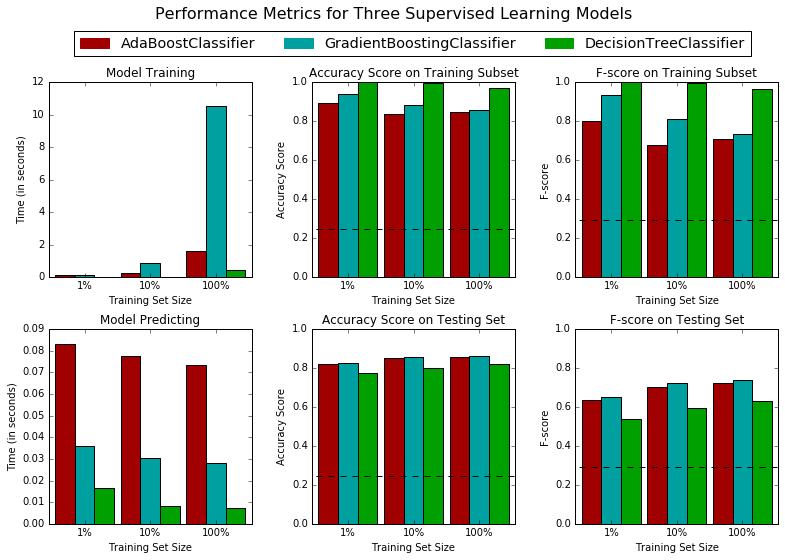

In [22]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors


# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state = 0)
clf_B = GradientBoostingClassifier(random_state = 0)
clf_C = AdaBoostClassifier(random_state = 0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(len(y_train)*0.01)
samples_10 = int(len(y_train)*0.1)
samples_100 = int(len(y_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model
*Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000.*  
**Hint:** Your answer should include discussion of the metrics, prediction/training time, and the algorithm's suitability for the data.

**Answer: **  
On the previos step I've applied most of the available in scikit-learn classification algorithms to the given dataset. I was looking for the alogorithm which shows the best F-score and accuracy (we would like to create accurate model which learns to minimize the amount of false positive predictions) as well as work faster than others (in order to provide fast results).  
The best performance showed the following algorithms:  
*  Decision Trees Classifier 
*  AdaBoost classifier
*  Gradient Boosting for classification  
  
Decision trees - algorithm which is easy to use and interpret, showed best time of prediction. As expected, without hyperparameter tuning, it overfits. Acquiring additional data and tuning the hyperparameters might decrease the overfitting. However, in this project I don't have a chance to get new data and my goal is to get best performance.  
  
AdaBoost classifier performs almost the same as Gradient Boosting for classification:
*  accuracy and F-score are close to each other keeping Gradient Boosting a bit ahead  
*  training time grows linearly with the increasing of training data; AdaBoost has much better training time, however Gradient Boosting even on 20 million samples dataset/laptop should be trained in ~3 hours which is still ok.  
  
I think CharityML should choose Gradient Boosting because it provides the best accuracy and F-score as well as the best prediction time (which leads to faster decision making).  

### Question 4 - Describing the Model in Layman's Terms
*In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **   
Interesting analogy of gradient descent provided by [6]: "Imagine, that you are trying to solve a very difficult problem. You give an initial solution, which may be bad, but then you see where you are wrong and you are going to improve that solution. But in every iteration only thing you do is alternating your strategy to correct the mistakes you made in the previous one. 

The next thing is more interesting. When you think you are done, you don't just throw away all but one solutions - you collect then, estimate the error in each and assign a number to them, which indicates, how important this solution is, according to it's correctness. And in order to have final solution, you just make a certain decision, based on "weak" answers you got. This combination of weak solutions works usually better, than a strong one."

These small solutions called weak learners - simple algorithms which predicts at least slightly better than random chance. The idea is to use the weak learners several times to get a succession of hypotheses, each one refocused on the examples that the previous ones found difficult and misclassified. [9]

Decision trees are used as the weak learner in gradient boosting. Learners are added one at a time, and existing learners in the model are not changed. Gradient descent math algorithm is used to minimize the loss (or minimize error) of the model when adding trees. After calculating the loss on each iteration, we must add a new weak learner to the model that reduces the loss. This process goes until the loss reaches an acceptable level or no longer improves. [10]

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

Below are some constraints that can be imposed on the construction of weak learners (decision trees):
*  Number of trees, generally adding more trees to the model can be very slow to overfit. The advice is to keep adding trees until no further improvement is observed.
*  Number of nodes or number of leaves, like depth, this can constrain the size of the tree, but is not constrained to a symmetrical structure if other constraints are used.
*  Number of observations per split imposes a minimum constraint on the amount of training data at a training node before a split can be considered
*  Minimim improvement to loss is a constraint on the improvement of any split added to a tree.

*  min_samples_split defines the minimum number of samples (or observations) which are required in a node to be considered for splitting. Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can lead to under-fitting hence;  
*  min_samples_leaf defines the minimum samples (or observations) required in a terminal node or leaf. Used to control over-fitting similar to min_samples_split. Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small;  
*  max_depth is the maximum depth of a tree. Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample. Generally, better results are seen with 4-8 levels;  
*  max_features is the number of features to consider while searching for a best split. These will be randomly selected. As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features. Higher values can lead to over-fitting but depends on case to case;  
*  n_estimators is the number of sequential trees to be modeled. Though alogithm is fairly robust at higher number of trees but it can still overfit at a point. 

I've tried to tune all parameters sequentially and found that min_sample_split and n_estimators improve the model performance.

In [189]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune
parameters = {
    'min_samples_split':[2,5,8],
    'n_estimators':[100,500,600]
}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer,
                        n_jobs=4,
                        verbose=1)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print "Unoptimized model\n------"
print "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed:  1.6min finished


Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8730
Final F-score on the testing data: 0.7571


In [190]:
grid_fit.best_params_

{'min_samples_split': 5, 'n_estimators': 500}

### Question 5 - Final Model Evaluation
_What is your optimized model's accuracy and F-score on the testing data? Are these scores better or worse than the unoptimized model? How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  
**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Benchmark Predictor | Unoptimized Model | Optimized Model |
| :------------: | :-----------------: | :---------------: | :-------------: | 
| Accuracy Score |         0.2478      | 0.8630            |         0.8730        |
| F-score        |     0.2917          |       0.7395            |   0.7571       |


**Answer: **  
Accuracy and F-score of the unoptimized/optimized models are provided above. The scores of the optimized model are better than unoptimized because hyperparameter tuning on a given data is sufficient part of the model optimization.
I'm not surprised that the the performance of the optimized Gradient Boosting classification is much better than naive predictor. However further tuning of the model requires significant efforts.

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data.  
_Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?_

**Answer:**  
According to the data visualization on the initial step, the following features differ mostly for income at least and more than $50k:  

1.  Number of working hours a week: I can mention - people who work more than 40 hours tend to earn more than 50k.
2.  Education - people with education mark 13 and higher tend to earn more than 50k.
3.  Age - people around 40 tend to earn more than $50k.
4.  Sex - just based on my subjective opinion.
5.  Work class - also based on my subjective perception, people from working class might work hard but earn less than managers.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

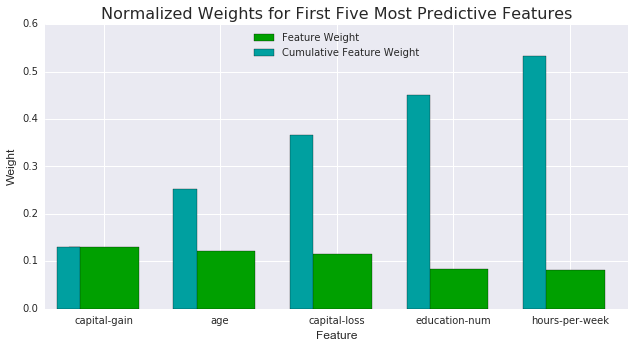

In [156]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set 
model = None

# TODO: Extract the feature importances
importances = best_clf.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
_How do these five features compare to the five features you discussed in **Question 6**? If you were close to the same answer, how does this visualization confirm your thoughts? If you were not close, why do you think these features are more relevant?_

**Answer:**  
Well, I was not close to the features: I've just guessed 2 features correctly: age and hours-per-week and with a wrong ranking. What I like about analysing the datasets with large amount of data is we - human - often make a decision based on subjective feelings and we're not always correct. The algorithm has found the heeden patterns in the data and decided that the most important features to split our dataset are:
1.  Capital gain
2.  Age 
3.  Capital loss
4.  Education
5.  Hours per week  
And it makes sence for me now.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [192]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print "Final Model trained on full data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))
print "\nFinal Model trained on reduced data\n------"
print "Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions))
print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5))

Final Model trained on full data
------
Accuracy on testing data: 0.8730
F-score on testing data: 0.7571

Final Model trained on reduced data
------
Accuracy on testing data: 0.8432
F-score on testing data: 0.7015


### Question 8 - Effects of Feature Selection
*How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?*  
*If training time was a factor, would you consider using the reduced data as your training set?*

**Answer:**  
When I train the model on 5 top features, F-score drops significantly.
Considering how much efforts costs me raising the F-score via hyperparameter tuning, I wouldn't choose this route.
If the training time was a factor, I would first consifer to switch to AdaBoost classifier.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### References 
1.  Scikit-learn documentation. http://scikit-learn.org/
2.  Choosing a Machine Learning Classifier. Edwin Chen. http://blog.echen.me/2011/04/27/choosing-a-machine-learning-classifier/  
3.  ML in the Valley. Cheng-Tao Chu. http://ml.posthaven.com/machine-learning-done-wrong
4.  The 10 Algorithms Machine Learning Engineers Need to Know. http://www.kdnuggets.com/2016/08/10-algorithms-machine-learning-engineers.html
5.  Application of AdaBoost Algorithm in Basketball Player Detection. Branko Markoski, Zdravko Ivanković, Ladislav Ratgeber, Predrag Pecev, Dragana Glušac. https://uni-obuda.hu/journal/Markoski_Ivankovic_Ratgeber_Pecev_Glusac_57.pdf
6.  Roman Trusov. https://www.quora.com/What-is-an-intuitive-explanation-of-gradient-boosted-trees/answer/Roman-Trusov?srid=D7wp
7.  scikit-learn Decision Trees Classiffier documentation 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
8.  scikit-learn algorithm cheat-sheet 
http://scikit-learn.org/stable/tutorial/machine_learning_map/
9.   Leslie Valiant. Probably Approximately Correct: Nature’s Algorithms for Learning and Prospering in a Complex World, page 152, 2013
10.  Jason Brownlee. A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning.  
http://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/
